In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load cleaned data
df = pd.read_csv('all_cars_cleaned.csv')

print("📊 DATA OVERVIEW:")
print(f"Dataset shape: {df.shape}")
print(f"Years covered: {df['Year'].min()} - {df['Year'].max()}")
print(f"Total sales volume: {df['Sales_Volume'].sum():,} units")

📊 DATA OVERVIEW:
Dataset shape: (50000, 11)
Years covered: 2010 - 2024
Total sales volume: 253,375,734 units


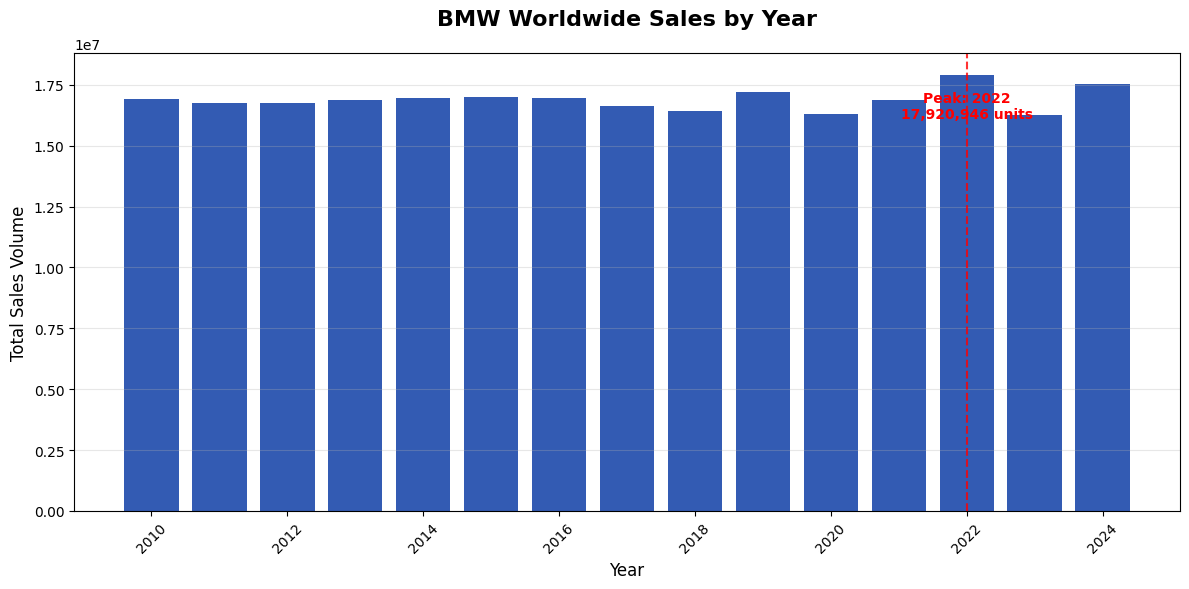

🎯 ANSWER: BMW achieved highest worldwide sales in 2022 with 17,920,946 units


In [5]:
# Yearly sales analysis
yearly_sales = df.groupby('Year')['Sales_Volume'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(yearly_sales.index, yearly_sales.values, color='#0032A0', alpha=0.8)
plt.title('BMW Worldwide Sales by Year', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales Volume', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Highlight best year
best_year = yearly_sales.idxmax()
best_sales = yearly_sales.max()
plt.axvline(x=best_year, color='red', linestyle='--', alpha=0.8)
plt.text(best_year, best_sales*0.9, f'Peak: {best_year}\n{best_sales:,} units',
         ha='center', fontweight='bold', color='red')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"🎯 ANSWER: BMW achieved highest worldwide sales in {best_year} with {best_sales:,} units")

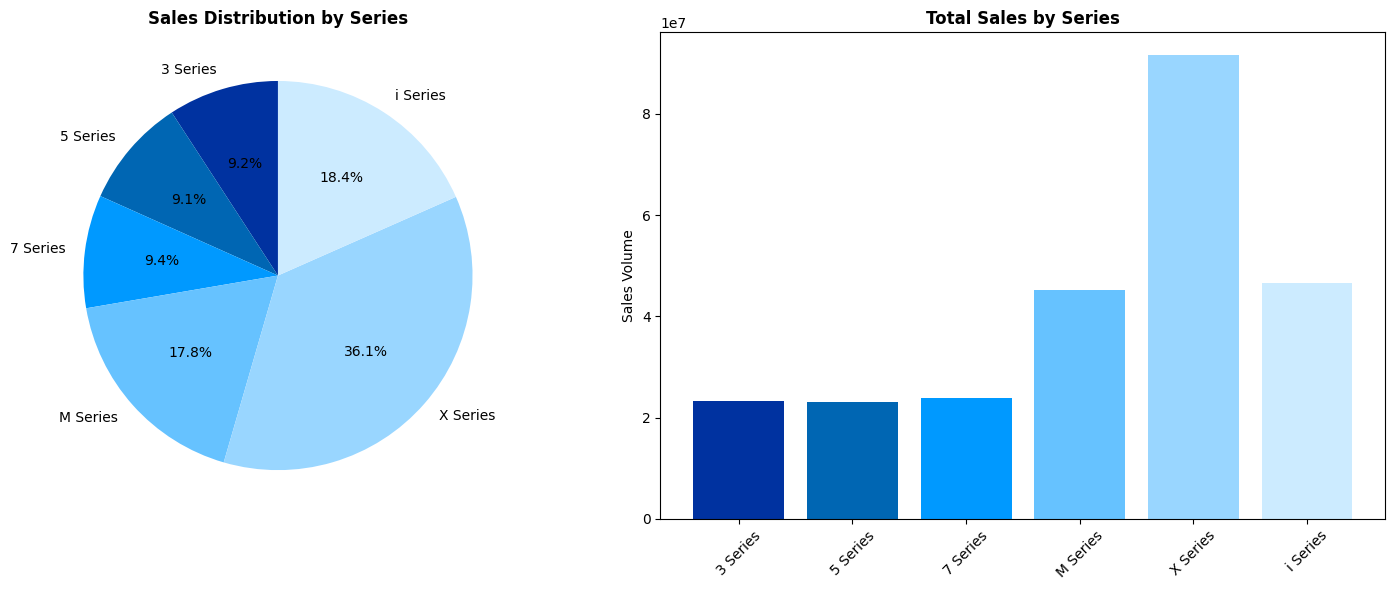

🎯 ANSWER: 3 Series is the best-selling series with 23,281,303 units (9.2% share)


In [7]:
# Categorize models into series
def categorize_series(model):
    model_str = str(model).upper()
    if '3 SERIES' in model_str:
        return '3 Series'
    elif '5 SERIES' in model_str:
        return '5 Series'
    elif '7 SERIES' in model_str:
        return '7 Series'
    elif model_str.startswith('X'):
        return 'X Series'
    elif model_str.startswith('M'):
        return 'M Series'
    elif model_str.startswith('I'):
        return 'i Series'
    else:
        return 'Other'

df['Series_Category'] = df['Model'].apply(categorize_series)

# Sales by series
series_sales = df.groupby('Series_Category')['Sales_Volume'].sum()

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
colors = ['#0032A0', '#0066B3', '#0099FF', '#66C2FF', '#99D6FF', '#CCEBFF']
ax1.pie(series_sales.values, labels=series_sales.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax1.set_title('Sales Distribution by Series', fontweight='bold')

# Bar chart
ax2.bar(series_sales.index, series_sales.values, color=colors[:len(series_sales)])
ax2.set_title('Total Sales by Series', fontweight='bold')
ax2.set_ylabel('Sales Volume')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

best_series = series_sales.index[0]
print(f"🎯 ANSWER: {best_series} is the best-selling series with {series_sales.iloc[0]:,} units ({series_sales.iloc[0]/series_sales.sum()*100:.1f}% share)")

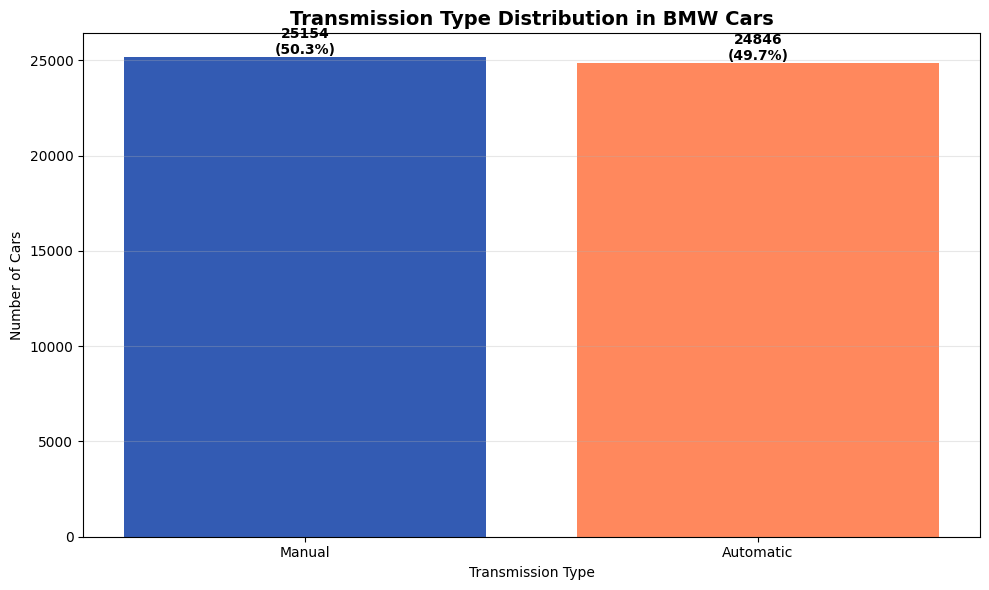

🎯 ANSWER: Manual transmission is most common with 25154 cars


In [8]:
transmission_dist = df['Transmission'].value_counts()

plt.figure(figsize=(10, 6))
colors = ['#0032A0', '#FF6B35']  # BMW blue and accent color
bars = plt.bar(transmission_dist.index, transmission_dist.values, color=colors, alpha=0.8)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}\n({height/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

plt.title('Transmission Type Distribution in BMW Cars', fontsize=14, fontweight='bold')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"🎯 ANSWER: {transmission_dist.index[0]} transmission is most common with {transmission_dist.iloc[0]} cars")

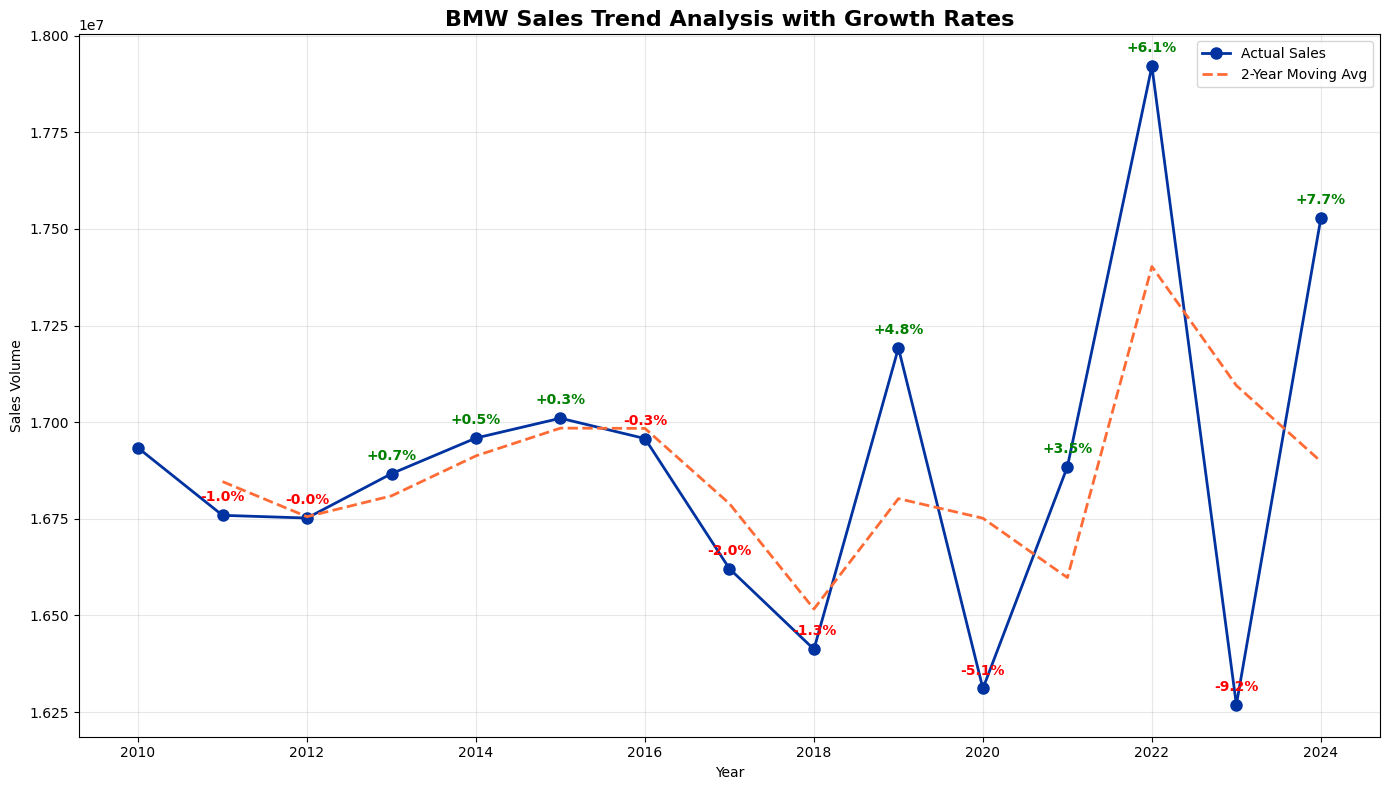

📈 Sales show a positive trend over years (correlation: 0.184)


In [10]:
# Since we don't have monthly data, analyze quarterly patterns by year
df['Year_Quarter'] = df['Year'].astype(str)  # Simplified for yearly analysis

yearly_trend = df.groupby('Year')['Sales_Volume'].sum()

# Calculate moving average for trend analysis
window = 2
moving_avg = yearly_trend.rolling(window=window).mean()

plt.figure(figsize=(14, 8))

# Plot actual vs trend
plt.plot(yearly_trend.index, yearly_trend.values, 'o-', linewidth=2,
         markersize=8, label='Actual Sales', color='#0032A0')
plt.plot(moving_avg.index, moving_avg.values, '--', linewidth=2,
         label=f'{window}-Year Moving Avg', color='#FF6B35')

# Growth rate annotations
for i, (year, sales) in enumerate(yearly_trend.items()):
    if i > 0:
        growth = ((sales - yearly_trend.iloc[i-1]) / yearly_trend.iloc[i-1]) * 100
        color = 'green' if growth > 0 else 'red'
        plt.annotate(f'{growth:+.1f}%', (year, sales),
                    textcoords="offset points", xytext=(0,10),
                    ha='center', fontweight='bold', color=color)

plt.title('BMW Sales Trend Analysis with Growth Rates', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Trend analysis
trend_correlation = np.corrcoef(yearly_trend.index, yearly_trend.values)[0, 1]
print(f"📈 Sales show a {'positive' if trend_correlation > 0 else 'negative'} trend over years (correlation: {trend_correlation:.3f})")

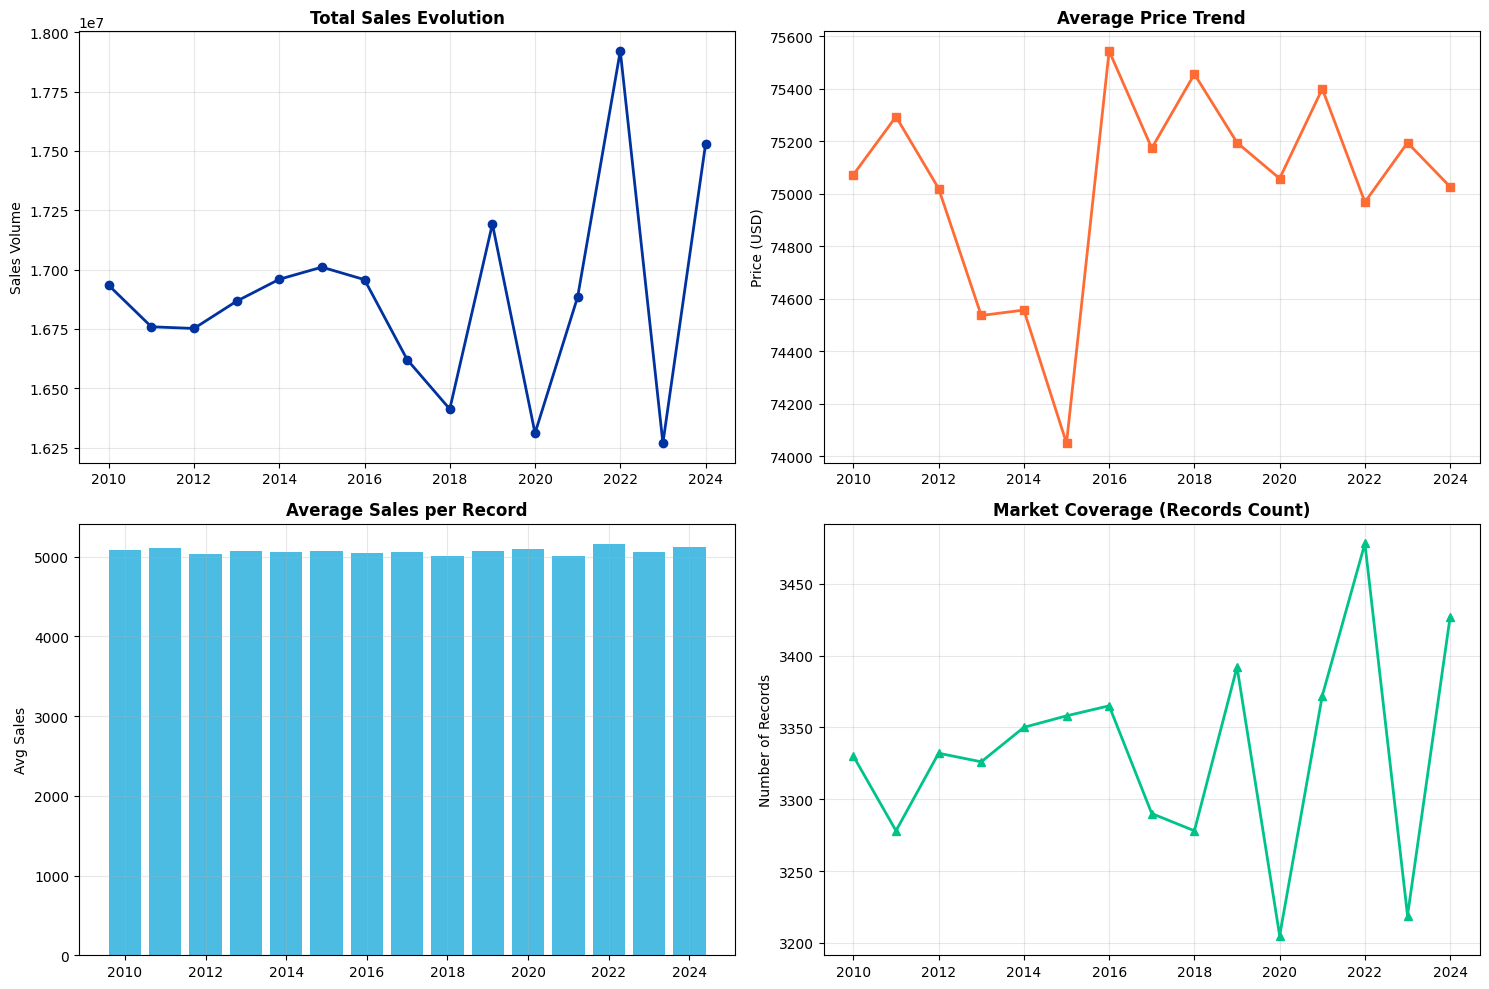

📊 PERFORMANCE EVOLUTION SUMMARY:
• Sales growth from 16,933,445 to 17,527,854
• Average price change: $75,072 → $75,026


In [11]:
# Detailed performance analysis
performance_metrics = df.groupby('Year').agg({
    'Sales_Volume': ['sum', 'mean', 'std', 'count'],
    'Price_USD': ['mean', 'median'],
    'Mileage_KM': 'mean'
}).round(2)

performance_metrics.columns = ['Total_Sales', 'Avg_Sales_Per_Record', 'Sales_Std',
                             'Records_Count', 'Avg_Price', 'Median_Price', 'Avg_Mileage']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Total Sales Evolution
axes[0,0].plot(performance_metrics.index, performance_metrics['Total_Sales'],
               marker='o', linewidth=2, color='#0032A0')
axes[0,0].set_title('Total Sales Evolution', fontweight='bold')
axes[0,0].set_ylabel('Sales Volume')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Average Price Trend
axes[0,1].plot(performance_metrics.index, performance_metrics['Avg_Price'],
               marker='s', linewidth=2, color='#FF6B35')
axes[0,1].set_title('Average Price Trend', fontweight='bold')
axes[0,1].set_ylabel('Price (USD)')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Sales per Record (Efficiency)
axes[1,0].bar(performance_metrics.index, performance_metrics['Avg_Sales_Per_Record'],
              color='#00A0D6', alpha=0.7)
axes[1,0].set_title('Average Sales per Record', fontweight='bold')
axes[1,0].set_ylabel('Avg Sales')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Market Coverage (Records Count)
axes[1,1].plot(performance_metrics.index, performance_metrics['Records_Count'],
               marker='^', linewidth=2, color='#00C389')
axes[1,1].set_title('Market Coverage (Records Count)', fontweight='bold')
axes[1,1].set_ylabel('Number of Records')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 PERFORMANCE EVOLUTION SUMMARY:")
print(f"• Sales growth from {performance_metrics['Total_Sales'].iloc[0]:,} to {performance_metrics['Total_Sales'].iloc[-1]:,}")
print(f"• Average price change: ${performance_metrics['Avg_Price'].iloc[0]:,.0f} → ${performance_metrics['Avg_Price'].iloc[-1]:,.0f}")

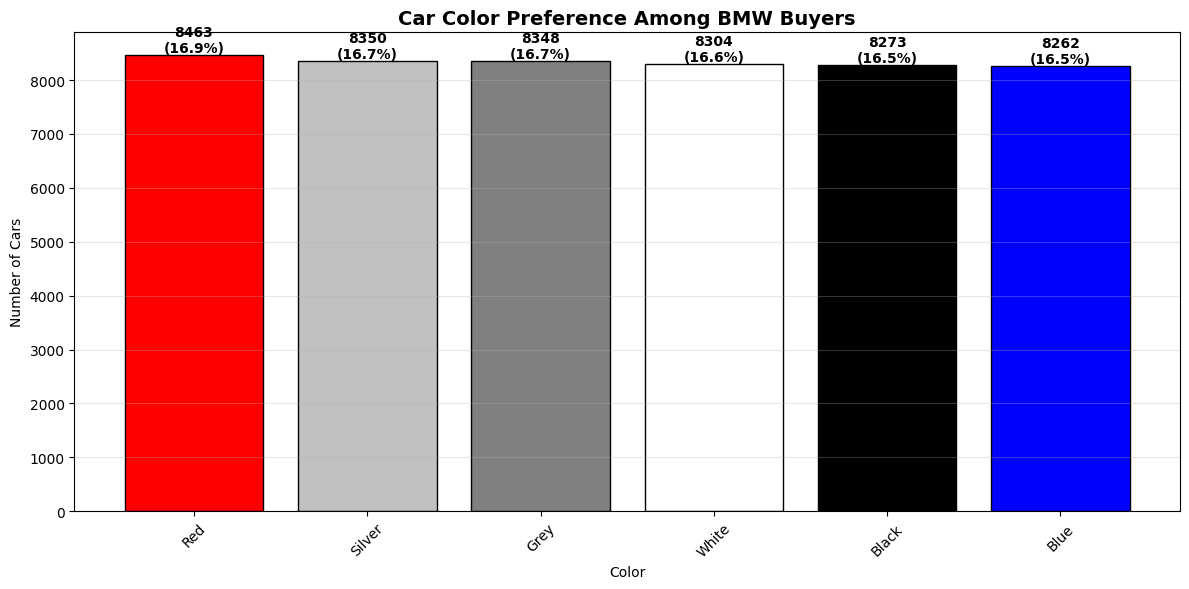

🎯 ANSWER: Red is the most popular color with 8463 cars


In [12]:
color_demand = df['Color'].value_counts()

plt.figure(figsize=(12, 6))
# Use actual color representations
color_map = {
    'Black': 'black', 'White': 'white', 'Silver': 'silver',
    'Blue': 'blue', 'Grey': 'grey', 'Red': 'red'
}

colors_plot = [color_map.get(color, 'gray') for color in color_demand.index]

bars = plt.bar(color_demand.index, color_demand.values, color=colors_plot, edgecolor='black')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}\n({height/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

plt.title('Car Color Preference Among BMW Buyers', fontsize=14, fontweight='bold')
plt.xlabel('Color')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"🎯 ANSWER: {color_demand.index[0]} is the most popular color with {color_demand.iloc[0]} cars")

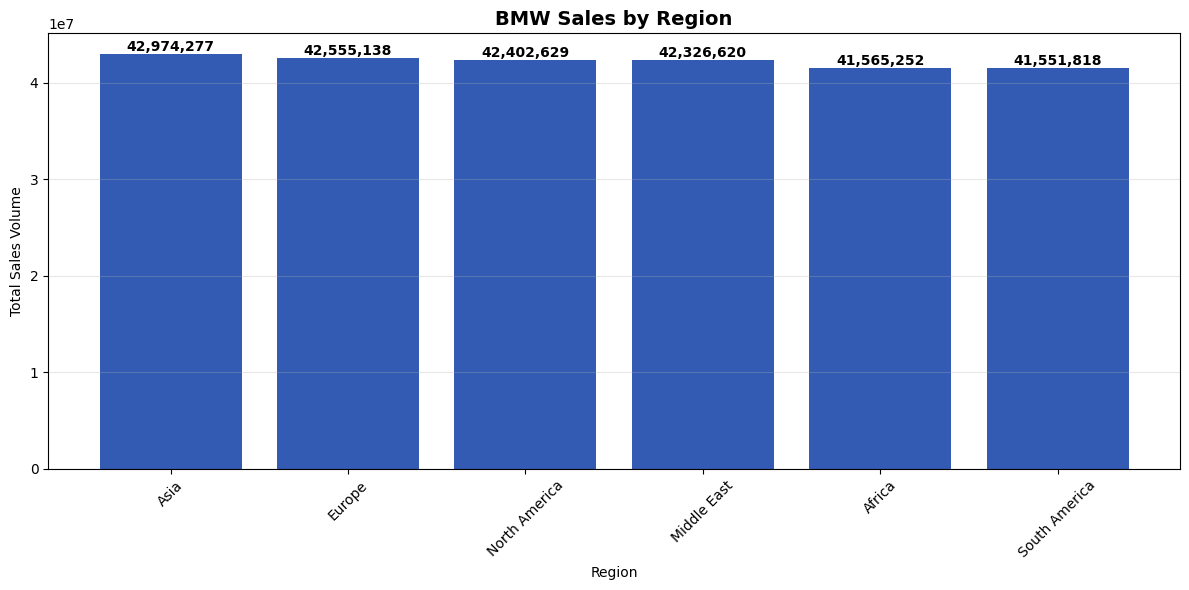

🎯 ANSWER: Asia has the highest number of BMW users with 42,974,277 units


In [13]:
region_sales = df.groupby('Region')['Sales_Volume'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(region_sales.index, region_sales.values, color='#0032A0', alpha=0.8)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom', fontweight='bold')

plt.title('BMW Sales by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

top_region = region_sales.index[0]
print(f"🎯 ANSWER: {top_region} has the highest number of BMW users with {region_sales.iloc[0]:,} units")

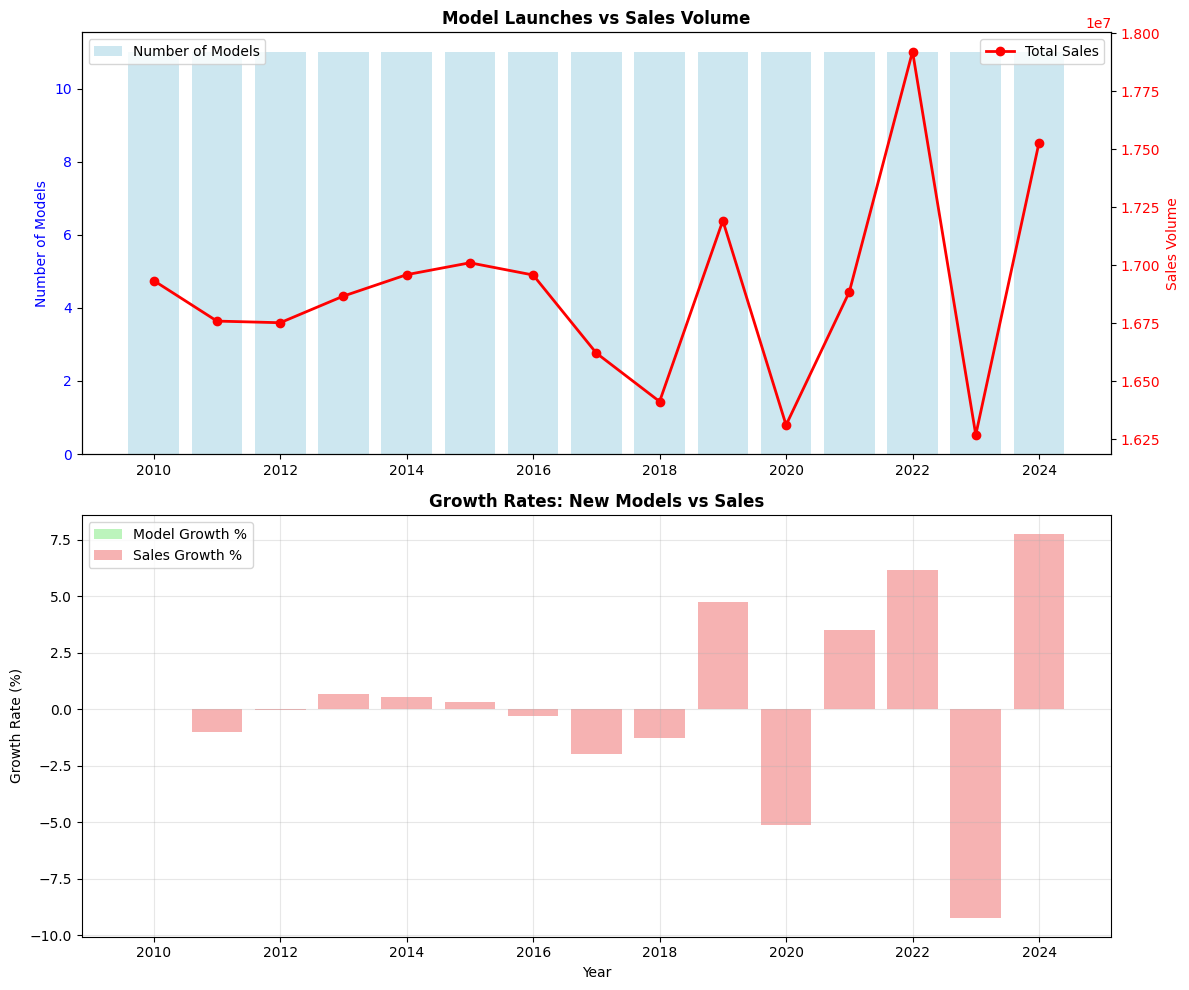

📈 Correlation between new models and sales: nan
🎯 ANSWER: New model launches have WEAK correlation on sales growth


In [14]:
# Analyze model launches per year
models_per_year = df.groupby('Year')['Model'].nunique()
new_models_growth = models_per_year.pct_change().fillna(0)
sales_growth = yearly_trend.pct_change().fillna(0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Model launches vs sales
ax1.bar(models_per_year.index, models_per_year.values, alpha=0.6,
        label='Number of Models', color='lightblue')
ax1.set_ylabel('Number of Models', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax1_twin = ax1.twinx()
ax1_twin.plot(yearly_trend.index, yearly_trend.values, 'ro-',
             linewidth=2, label='Total Sales')
ax1_twin.set_ylabel('Sales Volume', color='red')
ax1_twin.tick_params(axis='y', labelcolor='red')
ax1_twin.legend(loc='upper right')
ax1.set_title('Model Launches vs Sales Volume', fontweight='bold')

# Plot 2: Growth rates comparison
ax2.bar(new_models_growth.index, new_models_growth.values * 100, alpha=0.6,
        label='Model Growth %', color='lightgreen')
ax2.bar(sales_growth.index, sales_growth.values * 100, alpha=0.6,
        label='Sales Growth %', color='lightcoral')
ax2.set_xlabel('Year')
ax2.set_ylabel('Growth Rate (%)')
ax2.legend()
ax2.set_title('Growth Rates: New Models vs Sales', fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation analysis
correlation = np.corrcoef(models_per_year, yearly_trend)[0,1]
print(f"📈 Correlation between new models and sales: {correlation:.3f}")

if correlation > 0.7:
    impact = "STRONG positive impact"
elif correlation > 0.4:
    impact = "MODERATE positive impact"
else:
    impact = "WEAK correlation"

print(f"🎯 ANSWER: New model launches have {impact} on sales growth")

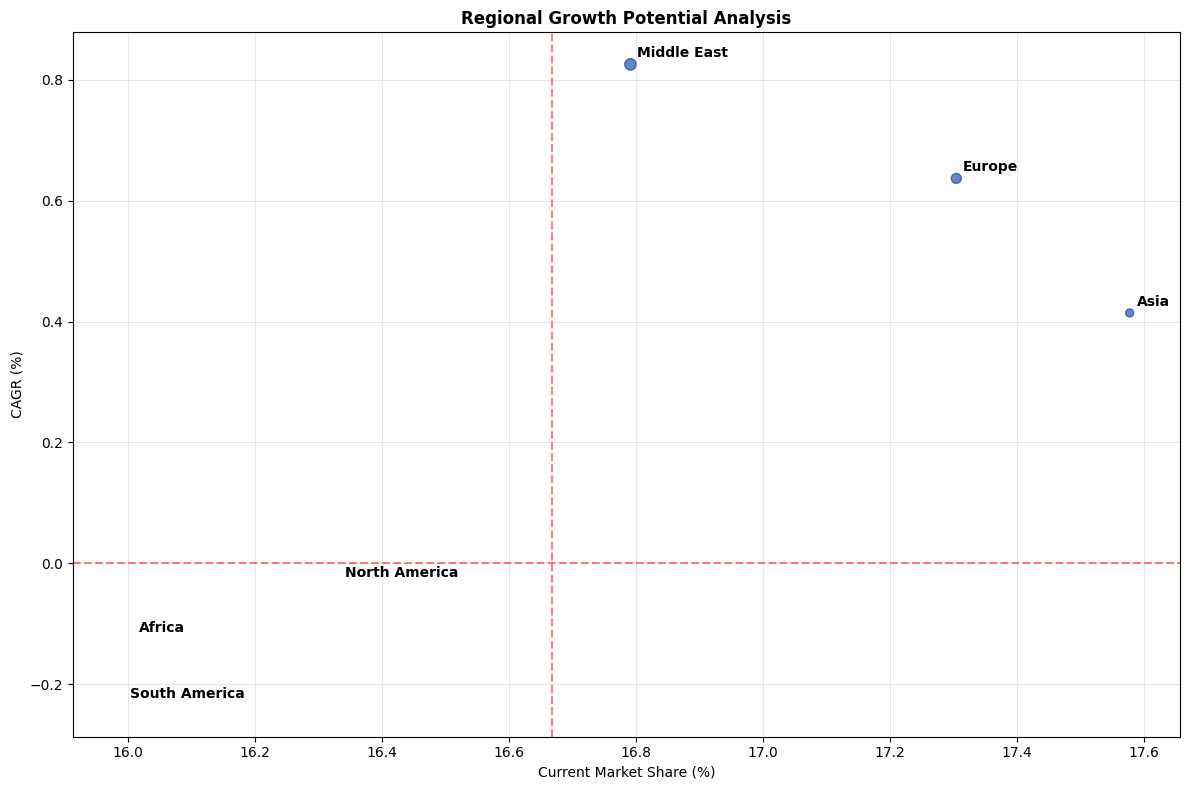

🏆 TOP REGIONS FOR FUTURE EXPANSION:
                 CAGR_%  Current_Market_Share_%  Growth_Potential_Score
Region                                                                 
Middle East    0.825406               16.790937                0.686813
Europe         0.636817               17.304138                0.526621
Asia           0.414229               17.577217                0.341419
North America -0.034409               16.329866               -0.028790
Africa        -0.124946               16.005987               -0.104947


In [15]:
# Calculate CAGR for each region
regional_growth = df.pivot_table(
    index='Year',
    columns='Region',
    values='Sales_Volume',
    aggfunc='sum'
).fillna(0)

# Calculate CAGR (Compound Annual Growth Rate)
def calculate_cagr(series):
    if len(series) < 2:
        return 0
    start_val = series.iloc[0]
    end_val = series.iloc[-1]
    if start_val > 0:
        periods = len(series) - 1
        return (end_val / start_val) ** (1/periods) - 1
    return 0

cagr_by_region = regional_growth.apply(calculate_cagr) * 100
cagr_sorted = cagr_by_region.sort_values(ascending=False)

# Current market share
current_market_share = regional_growth.iloc[-1] / regional_growth.iloc[-1].sum() * 100

# Growth potential matrix
growth_potential = pd.DataFrame({
    'CAGR_%': cagr_sorted,
    'Current_Market_Share_%': current_market_share,
    'Growth_Potential_Score': cagr_sorted * (100 - current_market_share) / 100
}).sort_values('Growth_Potential_Score', ascending=False)

plt.figure(figsize=(12, 8))

# Bubble chart: CAGR vs Market Share
plt.scatter(growth_potential['Current_Market_Share_%'],
           growth_potential['CAGR_%'],
           s=growth_potential['Growth_Potential_Score']*100,
           alpha=0.6, color='#0032A0')

# Annotate points
for region in growth_potential.index:
    plt.annotate(region,
                (growth_potential.loc[region, 'Current_Market_Share_%'],
                 growth_potential.loc[region, 'CAGR_%']),
                xytext=(5, 5), textcoords='offset points',
                fontweight='bold')

plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=growth_potential['Current_Market_Share_%'].mean(),
            color='red', linestyle='--', alpha=0.5)

plt.xlabel('Current Market Share (%)')
plt.ylabel('CAGR (%)')
plt.title('Regional Growth Potential Analysis', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("🏆 TOP REGIONS FOR FUTURE EXPANSION:")
print(growth_potential.head())

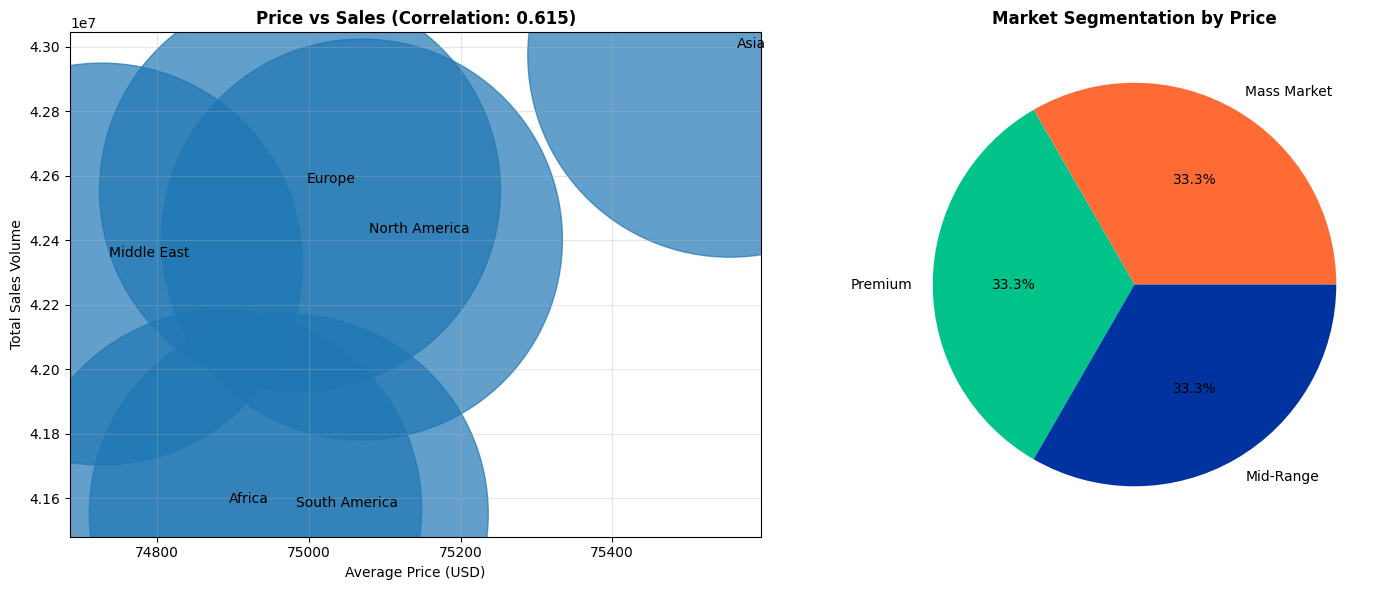

💰 ECONOMIC INDICATORS ANALYSIS:
• Price-Sales Correlation: 0.615
• Premium Markets: ['Asia', 'North America']
• Mass Markets: ['Africa', 'Middle East']


In [16]:
# Using price as proxy for economic indicator (premium positioning)
region_analysis = df.groupby('Region').agg({
    'Price_USD': ['mean', 'median', 'std'],
    'Sales_Volume': 'sum',
    'Year': 'count'
}).round(2)

region_analysis.columns = ['Avg_Price', 'Median_Price', 'Price_Std', 'Total_Sales', 'Records_Count']
region_analysis['Price_Premium_Ratio'] = region_analysis['Avg_Price'] / region_analysis['Avg_Price'].mean()

# Correlation analysis
price_sales_corr = region_analysis['Avg_Price'].corr(region_analysis['Total_Sales'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Price vs Sales correlation
ax1.scatter(region_analysis['Avg_Price'], region_analysis['Total_Sales'],
           s=region_analysis['Records_Count']*10, alpha=0.7)

for region in region_analysis.index:
    ax1.annotate(region,
                (region_analysis.loc[region, 'Avg_Price'],
                 region_analysis.loc[region, 'Total_Sales']),
                xytext=(5, 5), textcoords='offset points')

ax1.set_xlabel('Average Price (USD)')
ax1.set_ylabel('Total Sales Volume')
ax1.set_title(f'Price vs Sales (Correlation: {price_sales_corr:.3f})', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Market segmentation
premium_threshold = region_analysis['Avg_Price'].quantile(0.7)
mass_market_threshold = region_analysis['Avg_Price'].quantile(0.3)

def segment_market(price):
    if price >= premium_threshold:
        return 'Premium'
    elif price <= mass_market_threshold:
        return 'Mass Market'
    else:
        return 'Mid-Range'

region_analysis['Market_Segment'] = region_analysis['Avg_Price'].apply(segment_market)

segment_counts = region_analysis['Market_Segment'].value_counts()
ax2.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
        colors=['#FF6B35', '#00C389', '#0032A0'])
ax2.set_title('Market Segmentation by Price', fontweight='bold')

plt.tight_layout()
plt.show()

print("💰 ECONOMIC INDICATORS ANALYSIS:")
print(f"• Price-Sales Correlation: {price_sales_corr:.3f}")
print(f"• Premium Markets: {list(region_analysis[region_analysis['Market_Segment'] == 'Premium'].index)}")
print(f"• Mass Markets: {list(region_analysis[region_analysis['Market_Segment'] == 'Mass Market'].index)}")

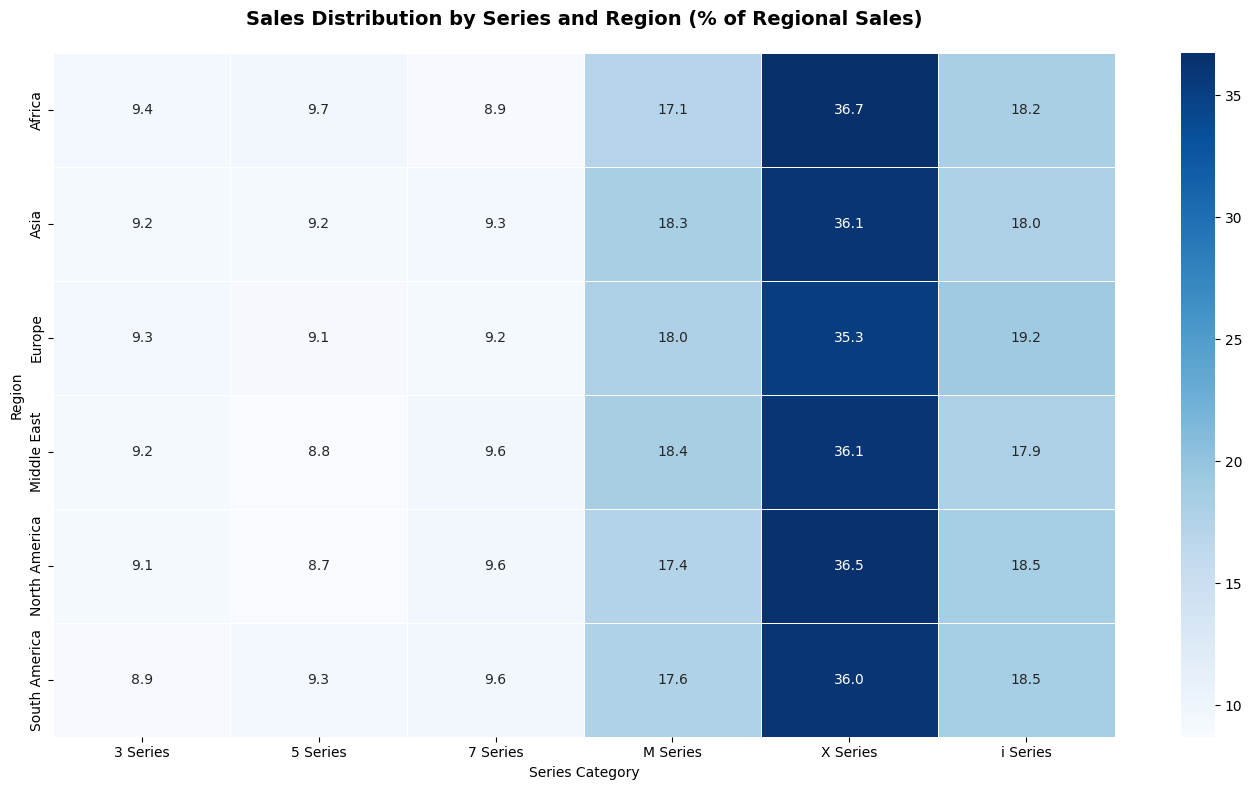

🏆 BEST PERFORMING MODELS BY REGION:
• Africa: X Series (36.7% of regional sales)
• Asia: X Series (36.1% of regional sales)
• Europe: X Series (35.3% of regional sales)
• Middle East: X Series (36.1% of regional sales)
• North America: X Series (36.5% of regional sales)
• South America: X Series (36.0% of regional sales)


In [17]:
# Regional performance by series
regional_series_performance = df.pivot_table(
    index='Region',
    columns='Series_Category',
    values='Sales_Volume',
    aggfunc='sum'
).fillna(0)

# Normalize by region total
regional_series_performance_pct = regional_series_performance.div(
    regional_series_performance.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 8))
sns.heatmap(regional_series_performance_pct, annot=True, cmap='Blues',
            fmt='.1f', linewidths=0.5)
plt.title('Sales Distribution by Series and Region (% of Regional Sales)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Series Category')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# Find best performing series in each region
best_series_by_region = regional_series_performance_pct.idxmax(axis=1)
best_series_share = regional_series_performance_pct.max(axis=1)

print("🏆 BEST PERFORMING MODELS BY REGION:")
for region in best_series_by_region.index:
    series = best_series_by_region[region]
    share = best_series_share[region]
    print(f"• {region}: {series} ({share:.1f}% of regional sales)")

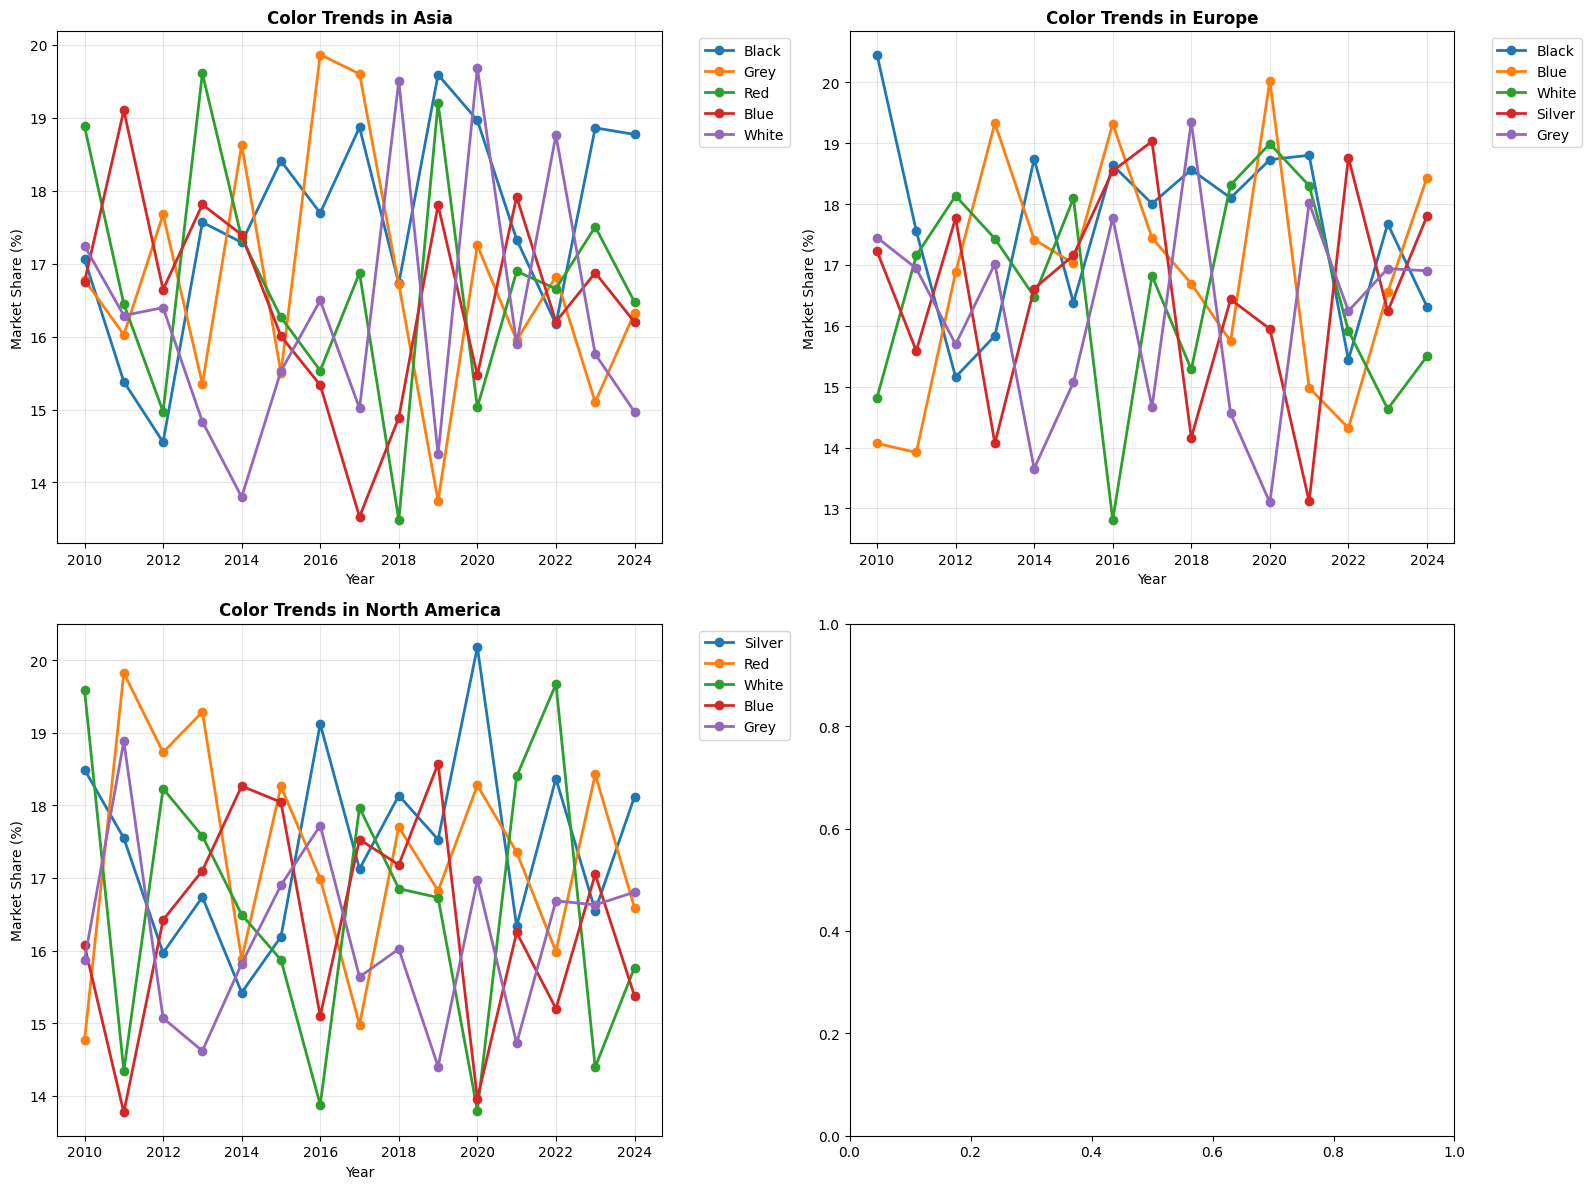

🎨 COLOR TREND INSIGHTS:
• Asia: Red → Black
• Europe: Black → Blue
• North America: White → Silver


In [18]:
# Color preference trends by region and year
color_trends = df.pivot_table(
    index=['Year', 'Region'],
    columns='Color',
    values='Sales_Volume',
    aggfunc='sum',
    fill_value=0
)

# Normalize by year-region total
color_trends_pct = color_trends.div(color_trends.sum(axis=1), axis=0) * 100

# Analyze top regions
top_regions = region_sales.head(3).index

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, region in enumerate(top_regions):
    if i < len(axes):
        region_data = color_trends_pct.xs(region, level='Region')

        # Plot top 5 colors for this region
        top_colors = region_data.mean().nlargest(5).index
        region_data[top_colors].plot(ax=axes[i], linewidth=2, marker='o')

        axes[i].set_title(f'Color Trends in {region}', fontweight='bold')
        axes[i].set_ylabel('Market Share (%)')
        axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎨 COLOR TREND INSIGHTS:")
for region in top_regions:
    region_data = color_trends_pct.xs(region, level='Region')
    current_top = region_data.iloc[-1].idxmax()
    previous_top = region_data.iloc[0].idxmax()
    print(f"• {region}: {previous_top} → {current_top}")

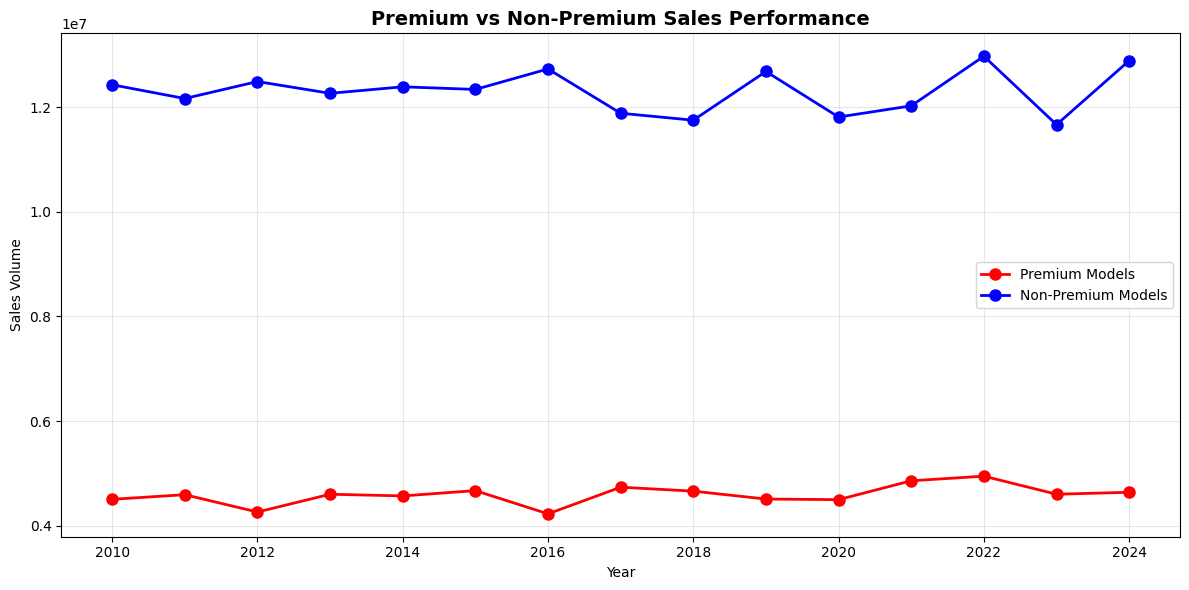

💎 PREMIUM MODEL RESILIENCE ANALYSIS:
• Premium models show better resilience during downturns
• Resilience score: +1.1%
• Premium share of total sales: 27.2%


In [19]:
# Identify premium vs non-premium models
premium_models = ['7 Series', 'M Series', 'i8']
df['Is_Premium'] = df['Series_Category'].isin(premium_models)

# Sales trend comparison
premium_sales = df[df['Is_Premium']].groupby('Year')['Sales_Volume'].sum()
non_premium_sales = df[~df['Is_Premium']].groupby('Year')['Sales_Volume'].sum()

# Calculate resilience during downturns
def calculate_resilience(series):
    # Identify years with overall sales decline
    yearly_total = df.groupby('Year')['Sales_Volume'].sum()
    decline_years = yearly_total[yearly_total.pct_change() < 0].index

    if len(decline_years) == 0:
        return 0

    resilience_scores = []
    for year in decline_years:
        if year in series.index and (year-1) in series.index:
            premium_change = series.loc[year] / series.loc[year-1] - 1
            total_change = yearly_total.loc[year] / yearly_total.loc[year-1] - 1
            resilience = premium_change - total_change
            resilience_scores.append(resilience)

    return np.mean(resilience_scores) if resilience_scores else 0

premium_resilience = calculate_resilience(premium_sales) * 100

plt.figure(figsize=(12, 6))

# Plot both trends
plt.plot(premium_sales.index, premium_sales.values, 'ro-',
         linewidth=2, label='Premium Models', markersize=8)
plt.plot(non_premium_sales.index, non_premium_sales.values, 'bo-',
         linewidth=2, label='Non-Premium Models', markersize=8)

plt.title('Premium vs Non-Premium Sales Performance', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("💎 PREMIUM MODEL RESILIENCE ANALYSIS:")
print(f"• Premium models show {'better' if premium_resilience > 0 else 'worse'} resilience during downturns")
print(f"• Resilience score: {premium_resilience:+.1f}%")
print(f"• Premium share of total sales: {premium_sales.sum()/df['Sales_Volume'].sum()*100:.1f}%")

In [20]:
print("\n" + "="*70)
print("🚗 BMW GLOBAL SALES ANALYTICS - EXECUTIVE SUMMARY")
print("="*70)

print(f"📈 PEAK PERFORMANCE:")
print(f"   • Best Year: {best_year} ({best_sales:,} units)")
print(f"   • Best Series: {best_series} ({series_sales.iloc[0]/series_sales.sum()*100:.1f}% share)")
print(f"   • Top Region: {top_region} ({region_sales.iloc[0]:,} units)")

print(f"\n🎯 CONSUMER INSIGHTS:")
print(f"   • Preferred Transmission: {transmission_dist.index[0]}")
print(f"   • Most Popular Color: {color_demand.index[0]}")
print(f"   • Premium Model Resilience: {premium_resilience:+.1f}%")

print(f"\n📊 GROWTH STRATEGY:")
print(f"   • Model Launch Impact: {correlation:.3f} correlation")
print(f"   • Top Expansion Regions: {', '.join(growth_potential.head(3).index.tolist())}")
print(f"   • Market Segmentation: {len(region_analysis[region_analysis['Market_Segment'] == 'Premium'])} premium markets")

print(f"\n💡 KEY RECOMMENDATIONS:")
print("   1. Focus on " + best_series + " series in high-growth regions")
print("   2. Leverage " + color_demand.index[0] + " color preference in marketing")
print("   3. " + ("Accelerate" if correlation > 0.5 else "Review") + " new model launch strategy")
print("   4. " + ("Expand" if premium_resilience > 0 else "Diversify") + " premium model portfolio")

print("="*70)


🚗 BMW GLOBAL SALES ANALYTICS - EXECUTIVE SUMMARY
📈 PEAK PERFORMANCE:
   • Best Year: 2022 (17,920,946 units)
   • Best Series: 3 Series (9.2% share)
   • Top Region: Asia (42,974,277 units)

🎯 CONSUMER INSIGHTS:
   • Preferred Transmission: Manual
   • Most Popular Color: Red
   • Premium Model Resilience: +1.1%

📊 GROWTH STRATEGY:
   • Model Launch Impact: nan correlation
   • Top Expansion Regions: Middle East, Europe, Asia
   • Market Segmentation: 2 premium markets

💡 KEY RECOMMENDATIONS:
   1. Focus on 3 Series series in high-growth regions
   2. Leverage Red color preference in marketing
   3. Review new model launch strategy
   4. Expand premium model portfolio
